This notebook is mainly used for capstone project .


In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

First, I imported the libraries from the Course 8 final project. I figured that those libraries would have everything I needed for this project. The two libraries that I ended up using were pandas and NumPy.

In [2]:
df=pd.read_csv("Data-Collisions.csv")
df.dtypes

c:\users\sayam jain\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In this I do a data acquisition that is I load a datset into a dataframe and listed the type of data.  

In [5]:
df["SEVERITYDESC"].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


Then, I began choosing columns to use from the dataframe that I created. The columns that I chose were SEVERITYCODE, which assigns a crash a value of 1, which means no injury, and 2, indicating injury, COLLISIONTYPE, which describes the type of crash, WEATHER, which describes the weather at the time of crash, ROADCOND, which describes the condition of the road at the time of crash, LIGHTCOND, which describes the light conditions at the time of crash, INATTENTIONIND, which describes whether the driver was distracted, and UNDERINFL, which describes whether the driver was under the influence.

<AxesSubplot:>

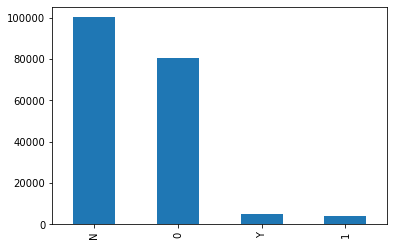

In [12]:
df['UNDERINFL'].value_counts().plot(kind='bar')

In [14]:
df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


<AxesSubplot:>

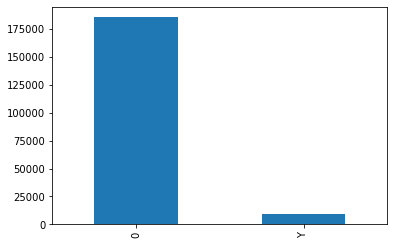

In [15]:
df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].value_counts().plot(kind='bar')

In [16]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING               0
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [17]:
df_new= df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND','JUNCTIONTYPE']]

<AxesSubplot:>

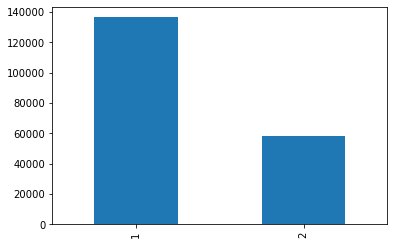

In [18]:
df_new['SEVERITYCODE'].value_counts().plot(kind='bar')

<AxesSubplot:>

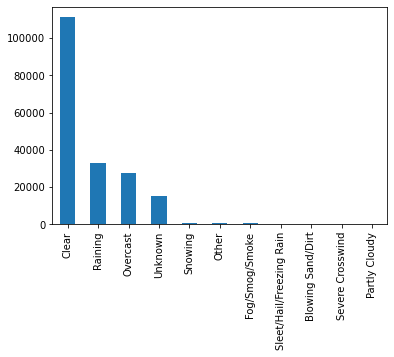

In [19]:
df_new['WEATHER'].value_counts().plot(kind='bar')

<AxesSubplot:>

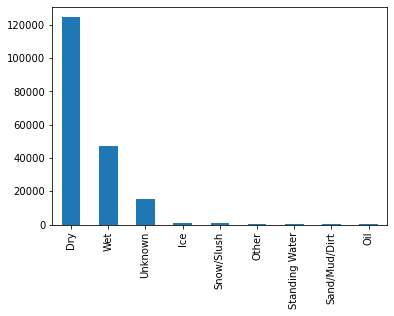

In [20]:
df_new['ROADCOND'].value_counts().plot(kind='bar')

<AxesSubplot:>

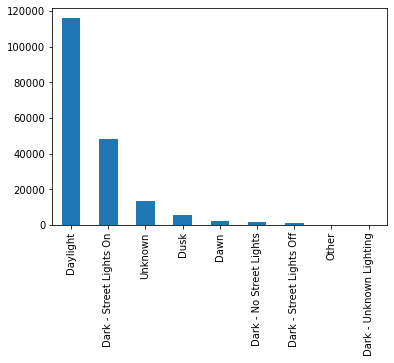

In [21]:
df_new['LIGHTCOND'].value_counts().plot(kind='bar')

<AxesSubplot:>

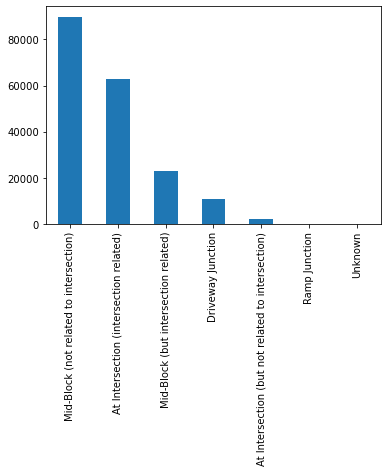

In [22]:
df_new['JUNCTIONTYPE'].value_counts().plot(kind='bar')

In [23]:
cleanup_nums = {"WEATHER": {"Clear": 1,"Raining": 2, "Overcast": 3, "Unknown": 4, "Snowing": 5, "Other": 6,"Fog/Smog/Smoke": 7, "Sleet/Hail/Freezing Rain": 8, "Blowing Sand/Dirt": 9, "Severe Crosswind": 10, "Partly Cloudy": 11},
                "ROADCOND": {"Dry": 1,"Wet": 2, "Unknown": 3, "Ice": 4, "Snow/Slush": 5, "Other": 6, "Standing Water": 7, "Sand/Mud/Dirt": 8, "Oil": 9},
                "LIGHTCOND": {"Daylight": 1, "Dark - Street Lights On": 2, "Unknown": 3, "Dusk": 4, "Dawn": 5, "Dark - No Street Lights": 6, "Dark - Street Lights Off": 7, "Other": 8, "Dark - Unknown Lighting": 9}}

In [24]:
from sklearn.utils import resample

In [25]:
df_maj=df[df.SEVERITYCODE==1]
df_min=df[df.SEVERITYCODE==2]
df_maj_dsample=resample(df_maj, replace=False, n_samples=58188, random_state=123)
balanced_df=pd.concat([df_maj_dsample, df_min])
balanced_df.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [26]:
x=np.asarray(balanced_df[['WEATHER', 'ROADCOND', 'LIGHTCOND']])
x[0:5]

array([['Raining', 'Wet', 'Dark - Street Lights On'],
       ['Clear', 'Dry', 'Daylight'],
       ['Unknown', 'Unknown', 'Unknown'],
       ['Clear', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight']], dtype=object)

In [27]:
balanced_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
25055,1,-122.292730,47.719265,29626,43684,43684,1778514,Matched,Intersection,36599.0,...,Wet,Dark - Street Lights On,NaN,5022026.0,0,10,Entering at angle,0,0,N
65280,1,-122.329124,47.608658,71557,84514,84514,2623093,Matched,Intersection,29926.0,...,Dry,Daylight,NaN,8235027.0,0,10,Entering at angle,0,0,N
86292,1,-122.292434,47.733753,94574,110476,110476,3377452,Matched,Intersection,35987.0,...,Unknown,Unknown,NaN,10323017.0,0,10,Entering at angle,0,0,N
155111,1,NaN,NaN,172907,222604,222884,E554578,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,0,11,From same direction - both going straight - bo...,0,0,N
64598,1,-122.339185,47.625594,70842,84273,84273,2898917,Matched,Block,NaN,...,Dry,Daylight,NaN,8069016.0,0,30,From opposite direction - all others,0,0,N


In [28]:
final_df=balanced_df[['SEVERITYCODE','WEATHER', 'ROADCOND', 'LIGHTCOND']]
final_df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
25055,1,Raining,Wet,Dark - Street Lights On
65280,1,Clear,Dry,Daylight
86292,1,Unknown,Unknown,Unknown
155111,1,Clear,Dry,Daylight
64598,1,Clear,Dry,Daylight


In [29]:
final_df.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [30]:
final_df.dropna()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
25055,1,Raining,Wet,Dark - Street Lights On
65280,1,Clear,Dry,Daylight
86292,1,Unknown,Unknown,Unknown
155111,1,Clear,Dry,Daylight
64598,1,Clear,Dry,Daylight
...,...,...,...,...
194663,2,Raining,Wet,Daylight
194666,2,Clear,Wet,Daylight
194668,2,Clear,Dry,Daylight
194670,2,Clear,Dry,Daylight


In [31]:
final_df.replace(cleanup_nums, inplace=True)
final_df.head()

c:\users\sayam jain\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
25055,1,2.0,2.0,2.0
65280,1,1.0,1.0,1.0
86292,1,4.0,3.0,3.0
155111,1,1.0,1.0,1.0
64598,1,1.0,1.0,1.0


In [32]:
final_df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
25055,1,2.0,2.0,2.0
65280,1,1.0,1.0,1.0
86292,1,4.0,3.0,3.0
155111,1,1.0,1.0,1.0
64598,1,1.0,1.0,1.0


In [33]:
final_df.dtypes

SEVERITYCODE      int64
WEATHER         float64
ROADCOND        float64
LIGHTCOND       float64
dtype: object

In [34]:
final_df['WEATHER'] = pd.to_numeric(final_df['WEATHER'], errors='coerce').fillna(0)

<ipython-input-34-b95b43e99873>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['WEATHER'] = pd.to_numeric(final_df['WEATHER'], errors='coerce').fillna(0)


In [35]:
int_df = final_df["WEATHER"].astype(int)
int_df.dtypes

dtype('int32')

In [36]:
np.int64(final_df['ROADCOND'])

array([2, 1, 3, ..., 1, 1, 1], dtype=int64)

In [37]:
np.int64(final_df['LIGHTCOND'])

array([2, 1, 3, ..., 1, 1, 4], dtype=int64)

In [38]:
numpy_data=np.int64(final_df['LIGHTCOND'])

In [39]:
final_df.dtypes

SEVERITYCODE      int64
WEATHER         float64
ROADCOND        float64
LIGHTCOND       float64
dtype: object

In [40]:
final_df = final_df.dropna()
print(final_df)

        SEVERITYCODE  WEATHER  ROADCOND  LIGHTCOND
25055              1      2.0       2.0        2.0
65280              1      1.0       1.0        1.0
86292              1      4.0       3.0        3.0
155111             1      1.0       1.0        1.0
64598              1      1.0       1.0        1.0
...              ...      ...       ...        ...
194663             2      2.0       2.0        1.0
194666             2      1.0       2.0        1.0
194668             2      1.0       1.0        1.0
194670             2      1.0       1.0        1.0
194671             2      1.0       1.0        4.0

[113497 rows x 4 columns]


In [41]:
print(final_df.round(0).astype(np.int64))

        SEVERITYCODE  WEATHER  ROADCOND  LIGHTCOND
25055              1        2         2          2
65280              1        1         1          1
86292              1        4         3          3
155111             1        1         1          1
64598              1        1         1          1
...              ...      ...       ...        ...
194663             2        2         2          1
194666             2        1         2          1
194668             2        1         1          1
194670             2        1         1          1
194671             2        1         1          4

[113497 rows x 4 columns]


In [42]:
final_df=final_df.round(0).astype(np.int64)

In [43]:
final_df.dtypes

SEVERITYCODE    int64
WEATHER         int64
ROADCOND        int64
LIGHTCOND       int64
dtype: object

In [44]:
x=np.asarray(final_df[['WEATHER', 'ROADCOND', 'LIGHTCOND']])
x[0:5]

array([[2, 2, 2],
       [1, 1, 1],
       [4, 3, 3],
       [1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [45]:
y=np.asarray(final_df['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (79447, 3) (79447,)
Test set: (34050, 3) (34050,)


In [47]:
# Building the KNN model
from sklearn.neighbors import KNeighborsClassifier
k=17

In [48]:

#Train Model & Predict
knn=KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)

knn_y_pred=knn.predict(x_test)
knn_y_pred[0:5]

array([2, 1, 1, 1, 1], dtype=int64)

In [50]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [51]:
jaccard_score(y_test, knn_y_pred)

0.3648763853367434

In [52]:
f1_score(y_test, knn_y_pred, average='macro')

0.5180780960740707

In [54]:
from sklearn.tree import DecisionTreeClassifier

import matplotlib.image as mpimg
from sklearn import tree

dt = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dt
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [55]:
dt_y_pred = dt.predict(x_test)

In [56]:
# Decision Tree Evaluation

jaccard_score(y_test, dt_y_pred)

0.17296615283339734

In [57]:
f1_score(y_test, dt_y_pred, average='macro')

0.48610939554341154

In [58]:
# Linear Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(x_train, y_train)

In [59]:
LR_y_pred = LR.predict(x_test)

In [60]:
LR_y_prob = LR.predict_proba(x_test)

In [61]:
LR_y_prob = LR.predict_proba(x_test)
log_loss(y_test, LR_y_prob)

0.6818543944060272

In [62]:
# Linear Regression Evaluation

jaccard_score(y_test, LR_y_pred)

0.31378286313215126

In [63]:
f1_score(y_test, LR_y_pred, average='macro')

0.5321816635757292

complete the project